In [1]:
import FinanceDataReader as fdr

In [2]:
# 삼성전자, 2017년 ~ 현재 일별 시세 받아오기
fdr.DataReader('005930')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-03-22,985,999,981,982,43730,NaN
1997-03-24,1013,1028,994,1009,157100,0.027495
1997-03-25,1022,1084,1017,1076,253810,0.066402
1997-03-26,1077,1093,1052,1067,298387,-0.008364
1997-03-27,1058,1067,1031,1032,148690,-0.032802
...,...,...,...,...,...,...
2021-03-08,82900,83000,81600,82000,17641256,-0.001218
2021-03-09,81400,81900,80600,81400,25420764,-0.007317
2021-03-10,82400,82500,80700,80900,20038422,-0.006143


In [8]:
fdr??

Type:        module
String form: <module 'FinanceDataReader' from '/usr/local/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/FinanceDataReader/__init__.py'>
File:        /usr/local/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/FinanceDataReader/__init__.py
Source:     
from .data import (DataReader)
from .data import (StockListing)
from .data import (EtfListing)
from . import (chart)

__version__ = '0.9.31'

__all__ = ['__version__', 'DataReader', 'StockListing', 'EtfListing', 'chart']


In [9]:
df = fdr.DataReader('005930','2017','2021')

<AxesSubplot:xlabel='Date'>

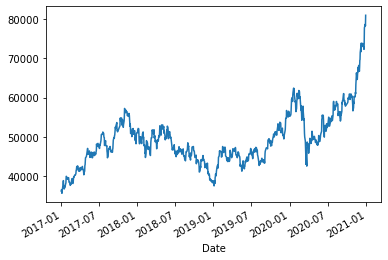

In [10]:
df["Close"].plot()


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
# 한국 거래소 상장 종목 전체 가져오기
# KRX,
# fdr.StockListing("KRX")
# fdr.StockListing?

In [15]:
us_snp_df = fdr.StockListing('S&P500')
us_nas_df = fdr.StockListing('NASDAQ') 
us_ny_df = fdr.StockListing('NYSE') 
us_amex_df = fdr.StockListing('AMEX') 

/usr/local/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')
100%|██████████| 291/291 [00:00<00:00, 1060.61it/s]


In [16]:
us_nas_df.head()

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


In [10]:
us_nas_df.describe()

,Symbol,Name,Industry,IndustryCode
count,3558,3558,3556,3556
unique,3558,3472,55,55
top,HURC,CHS Inc PRF,생명과학 및 메디컬 리서치,562020
freq,1,5,574,574


In [17]:
# us_nas_df.to_csv('nasdaq.csv', index=False)
pd.read_csv('nasdaq.csv')

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060.0
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010.0
2,AMZN,Amazon.com Inc,다양한 소매업,534020.0
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010.0
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010.0
...,...,...,...,...
3553,HCIC,Hennessy Capital Investment V Corp,기타 금융업,556010.0
3554,ENVI,Environmental Impact Acquisition Corp,기타 금융업,556010.0
3555,OCAX,OCA Acquisition Corp,NaN,NaN
3556,SLCR,Silver Crest Acquisition Corp,기타 금융업,556010.0


### 상장종목 가져오기

In [18]:
df_krx = pd.read_csv('krx.csv')
df_krx.shape

(7303, 10)

In [19]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [35]:
# 종목명으로 종목 코드 받아오는 함수 만들기
# df_krx의 Name column 에서 같은 값이 있으면 Row의 Symbol 컬럼 값을 List 로 name_list에
def item_code_by_item_name(item_name):
    """
    종목명을 받아서 종목 코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [36]:
df_krx.shape

(7303, 10)

In [37]:
df_krx[["Symbol","Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [23]:
# 종목 이름으로 코드네임 가져오
df_krx.loc[df_krx["Name"] == "빅히트","Symbol"].tolist()[0]

'352820'

In [47]:
#종목명으로 일별시세 받아오는 함수 만들기
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    # item_code = item_code_by_item_name(item_name)
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code_by_item_name(item_name), str(year))
        return df_day
    else:
        return False
        

In [46]:
find_item_list("NAVER", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,155821,157623,155220,155621,30777,0.002583
2017-01-03,155620,155620,153617,153618,51766,-0.012871
2017-01-04,155220,162230,154419,162230,120359,0.056061
2017-01-05,162230,162230,158424,158425,68724,-0.023454
2017-01-06,158424,160427,157423,160027,50269,0.010112
...,...,...,...,...,...,...
2021-03-05,386000,386500,371000,377500,1594386,-0.035760
2021-03-08,382000,386000,366500,368500,1031748,-0.023841
2021-03-09,366500,371500,350000,361500,1313900,-0.018996


In [48]:
find_item_list("LG화학",2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,250000,255000,247500,253000,294947,-0.030651
2017-01-03,255000,264000,254000,262000,253540,0.035573
2017-01-04,263000,269000,262000,268500,255597,0.024809
2017-01-05,267000,268500,265000,267500,148537,-0.003724
2017-01-06,268000,268500,265000,266000,84524,-0.005607
...,...,...,...,...,...,...
2021-03-05,853000,922000,853000,904000,548940,0.045087
2021-03-08,911000,915000,889000,890000,289075,-0.015487
2021-03-09,888000,890000,850000,861000,436628,-0.032584


<AxesSubplot:xlabel='Date'>

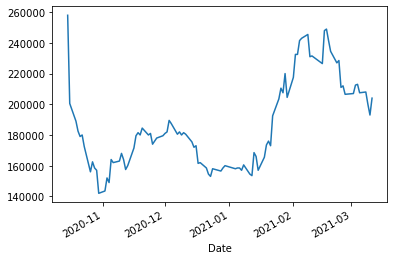

In [52]:
stock_daily = find_item_list('빅히트')
#빅히트의 일별 시세 시각화
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

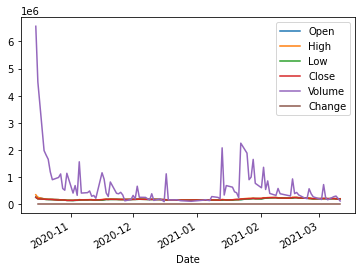

In [53]:
#전체 데이터 프레임을 시각화
stock_daily.plot()

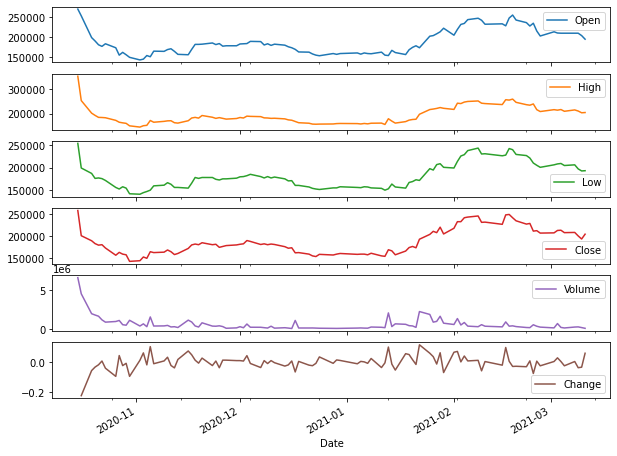

In [56]:
#서브 플롯으로 그리기
g = stock_daily.plot(subplots=True, figsize=(10,8))

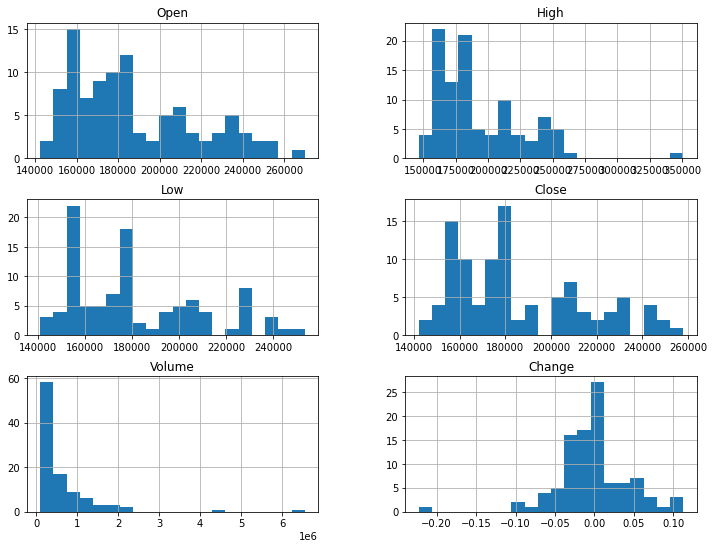

In [62]:
#히스토그램으로 그리기
#stock_daily.hist() -> 로그가 찍히는게 보기 싫으면 변수에 담으면 없어짐 
# h = stock_daily.hist(figsize=(12,9))
#빈도 (막대의 갯수 설정)
h = stock_daily.hist(figsize=(12,9), bins=20)

<AxesSubplot:xlabel='Date'>

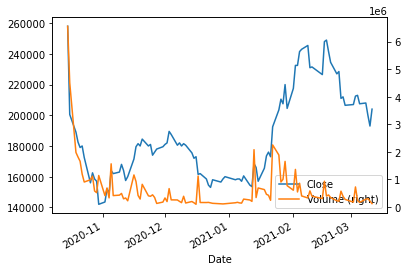

In [63]:
#종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close","Volume"]].plot(secondary_y="Volume")

In [66]:
format(1e6,",")

'1,000,000.0'

In [67]:
format(10**6,",")

'1,000,000'

In [68]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,100.000000,100.00000,100.000000,100.000000,1.000000e+02,99.000000
mean,187090.000000,193065.00000,181405.000000,185965.000000,6.499759e+05,-0.001304
std,30261.518385,34256.43455,27568.435966,28651.886165,8.674266e+05,0.045590
min,142500.000000,146500.00000,141000.000000,142000.000000,9.701000e+04,-0.222868
25%,161875.000000,166000.00000,157000.000000,161875.000000,2.076278e+05,-0.024503
50%,180250.000000,183000.00000,175750.000000,180000.000000,3.880780e+05,0.002353
75%,209500.000000,216500.00000,200500.000000,207125.000000,7.384965e+05,0.013594
max,270000.000000,351000.00000,253500.000000,258000.000000,6.557212e+06,0.112717
